# GradientBoostingRegressor example

**Example using the gbr function in the stepAIC module**

The **gbr** function in the stepAIC module provides output of fitted regression model and summary statistics using the sklearn GradientBoostingRegressor function

The **gbr** function standardizes the X input by default. 

This example shows how to test the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Before running this notebook, first install the stepAIC module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [7]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

## Read X and y from the sklearn diabetes data set

In [1]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into training and testing subsets

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting GradientBoostingRegressor models, please wait ...


GradientBoostingRegressor statistics of fitted ensemble model in model_outputs['stats']:


| Statistic          |   GradientBoostingRegressor |
|:-------------------|----------------------------:|
| r-squared          |                 0.835903    |
| adjusted r-squared |                 0.831104    |
| n_samples          |               353           |
| df residuals       |               343           |
| df model           |                 9           |
| F-statistic        |               194.136       |
| Prob (F-statistic) |                 1.11022e-16 |
| RMSE               |                31.5772      |
| Log-Likelihood     |             -1719.6         |
| AIC                |              3459.19        |
| BIC                |              3497.86        |


Done
Time elapsed: 0.31 sec


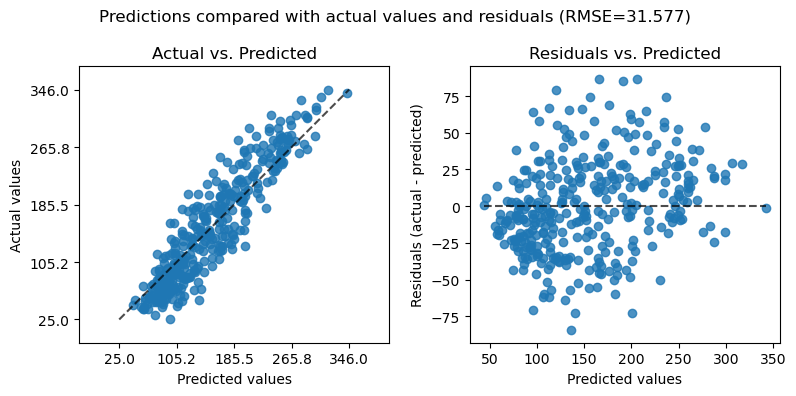

In [3]:
from stepAIC import gbr
train_model, train_output = gbr(X_train, y_train)

## Test the model with the testing data subset

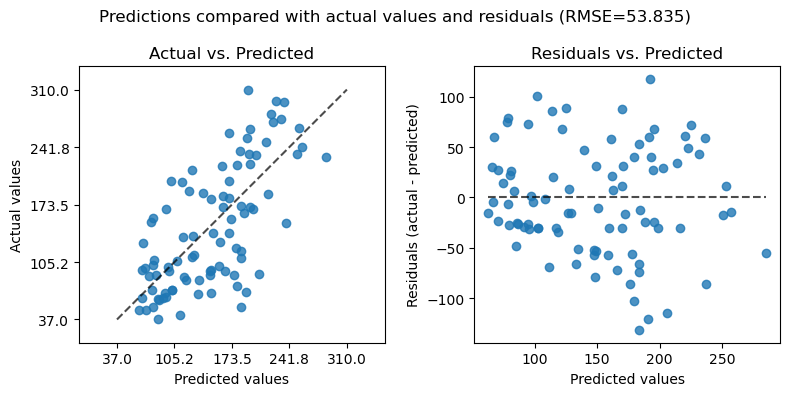

In [4]:
from stepAIC import plot_predictions_from_test
fig = plot_predictions_from_test(train_model, X_test, y_test, scaler=train_output['scaler'])
fig.savefig("GradientBoostingRegressor_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

Fitting GradientBoostingRegressor models, please wait ...


GradientBoostingRegressor statistics of fitted ensemble model in model_outputs['stats']:


| Statistic          |   GradientBoostingRegressor |
|:-------------------|----------------------------:|
| r-squared          |                 0.799039    |
| adjusted r-squared |                 0.794377    |
| n_samples          |               442           |
| df residuals       |               432           |
| df model           |                 9           |
| F-statistic        |               190.853       |
| Prob (F-statistic) |                 1.11022e-16 |
| RMSE               |                34.5206      |
| Log-Likelihood     |             -2192.54        |
| AIC                |              4405.08        |
| BIC                |              4445.99        |


Done
Time elapsed: 0.30 sec


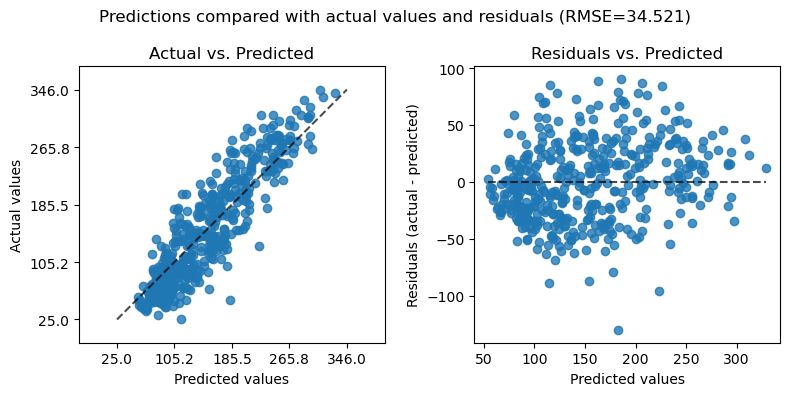

In [5]:
from stepAIC import gbr
final_model, final_output = gbr(X, y)

## User instructions

In [6]:
help(gbr)

Help on function gbr in module stepAIC:

gbr(X, y, **kwargs)
    GradientBoostingRegressor linear regression
    Beta version

    by
    Greg Pelletier
    gjpelletier@gmail.com
    30-May-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        standardize= 'on' (default) or 'off' where
            'on': standardize X using sklearn.preprocessing StandardScaler
            'off': do not standardize X (only used if X is already standardized)
        random_state= (default random_state=42)        - initial random seed
        nfolds= number of folds to use for cross-validation (CV)

    Standardization is generally recommended

    RETURNS
        model_objects, model_outputs
            model_obje